In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
'''
PPDA (Passes Allowed Per Defensive Action) is a metric that measures defensive pressure.

TPDA = Opponent's Touches / Your Team's Defensive Actions
Defensive Actions = Tackles + Interceptions + Challenges/Pressures (We'll have just Tackles as fbref doesn't provide zone based inteceptions and pressures)

Note: A lower TPDA indicates more aggressive pressing (more defensive actions per opponent touch).


'''

"\nPPDA (Passes Allowed Per Defensive Action) is a metric that measures defensive pressure.\n\nTPDA = Opponent's Touches / Your Team's Defensive Actions\nDefensive Actions = Tackles + Interceptions + Challenges/Pressures (We'll have just Tackles as fbref doesn't provide zone based inteceptions and pressures)\n\nNote: A lower TPDA indicates more aggressive pressing (more defensive actions per opponent touch).\n\n\n"

In [7]:
passes = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_passing_cleaned.csv')
defense = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_defense_cleaned.csv')
poss_vs = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_vspossession_cleaned.csv')


In [8]:
defense.columns

Index(['Squad', 'Players_used', '90s', 'Tkl_attempted', 'TklW', 'Tkl_Def',
       'Tkl_Mid', 'Tkl_Att', 'Drib_Tkl', 'Drib_chal', 'Drib_Tkl%', 'Chal_Lost',
       'Blocks', 'Shots_blocked', 'Pass_blocked', 'Interceptions', 'Tkl+Int',
       'Clr', 'Err_shot'],
      dtype='object')

In [23]:
def_cols = ['Squad','Tkl_Def','Tkl_Mid','Tkl_Att','Pass_blocked','Interceptions','Err_shot']

#Note that the Tkls are attempted, which means pressure was applied regardless of a successful outcome or not

In [24]:
touch_cols = ['Squad','Touches_Def3rd','Touches_Mid3rd','Touches_Att3rd','Touches_AttPen']

In [25]:
poss_vs.head()

,Squad,Players_used,Poss,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,...,Carries,TotDist,PrgDist,PrgC,Carry1/3,Carry_PA,Mis,Dis,Pass_Rec,Pass_PrgR
0,Arsenal,25,43.1,38.0,19306,2948,7642,7501,4397,632,...,10350,57925,30357,618,413,162,451,338,12077,927
1,Aston Villa,28,49.5,38.0,21614,2408,6804,9497,5515,886,...,12031,65638,34386,688,462,205,491,327,14278,1292
2,Bournemouth,29,51.5,38.0,22681,2841,8227,9246,5446,934,...,12104,65710,32384,685,452,203,663,390,13911,1280
3,Brentford,28,52.1,38.0,23090,2608,7185,8991,7103,1189,...,12890,68221,36588,835,579,294,507,319,14889,1547
4,Brighton,32,47.7,38.0,22046,2949,8740,9148,4374,877,...,12304,64473,31459,607,355,243,503,355,14102,1196


In [26]:
poss_vs['Squad'] = poss_vs['Squad'].str.replace('vs ', '', regex = False)

In [27]:
poss_vs.head()

,Squad,Players_used,Poss,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,...,Carries,TotDist,PrgDist,PrgC,Carry1/3,Carry_PA,Mis,Dis,Pass_Rec,Pass_PrgR
0,Arsenal,25,43.1,38.0,19306,2948,7642,7501,4397,632,...,10350,57925,30357,618,413,162,451,338,12077,927
1,Aston Villa,28,49.5,38.0,21614,2408,6804,9497,5515,886,...,12031,65638,34386,688,462,205,491,327,14278,1292
2,Bournemouth,29,51.5,38.0,22681,2841,8227,9246,5446,934,...,12104,65710,32384,685,452,203,663,390,13911,1280
3,Brentford,28,52.1,38.0,23090,2608,7185,8991,7103,1189,...,12890,68221,36588,835,579,294,507,319,14889,1547
4,Brighton,32,47.7,38.0,22046,2949,8740,9148,4374,877,...,12304,64473,31459,607,355,243,503,355,14102,1196


In [30]:
base_df = defense[def_cols]
df = base_df.merge(poss_vs[touch_cols], on = 'Squad', how = 'left')


In [31]:
df.head()

,Squad,Tkl_Def,Tkl_Mid,Tkl_Att,Pass_blocked,Interceptions,Err_shot,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen
0,Arsenal,220,249,129,222,225,33,7642,7501,4397,632
1,Aston Villa,293,249,95,222,240,43,6804,9497,5515,886
2,Bournemouth,290,299,102,323,351,22,8227,9246,5446,934
3,Brentford,289,223,121,281,285,28,7185,8991,7103,1189
4,Brighton,287,297,121,317,315,29,8740,9148,4374,877


In [32]:
df['TPT_def'] = df['Touches_Def3rd']/df['Tkl_Def']
df['TPT_mid'] = df['Touches_Mid3rd']/df['Tkl_Mid']
df['TPT_att'] = df['Touches_Att3rd']/df['Tkl_Att']

In [40]:
df.head()

,Squad,Tkl_Def,Tkl_Mid,Tkl_Att,Pass_blocked,Interceptions,Err_shot,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,Touches_AttPen,TPT_def,TPT_mid,TPT_att
0,Arsenal,220,249,129,222,225,33,7642,7501,4397,632,34.736364,30.124498,34.085271
1,Aston Villa,293,249,95,222,240,43,6804,9497,5515,886,23.221843,38.140562,58.052632
2,Bournemouth,290,299,102,323,351,22,8227,9246,5446,934,28.368966,30.923077,53.392157
3,Brentford,289,223,121,281,285,28,7185,8991,7103,1189,24.861592,40.318386,58.702479
4,Brighton,287,297,121,317,315,29,8740,9148,4374,877,30.452962,30.801347,36.148760


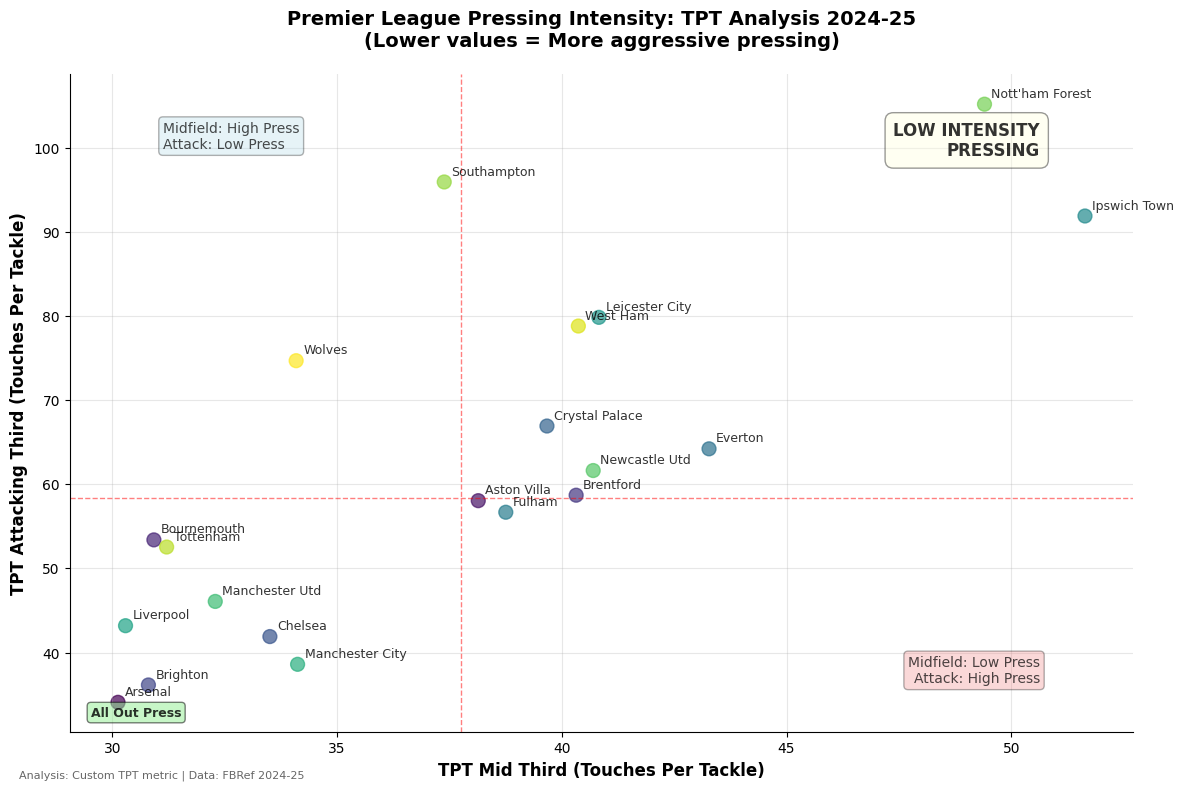

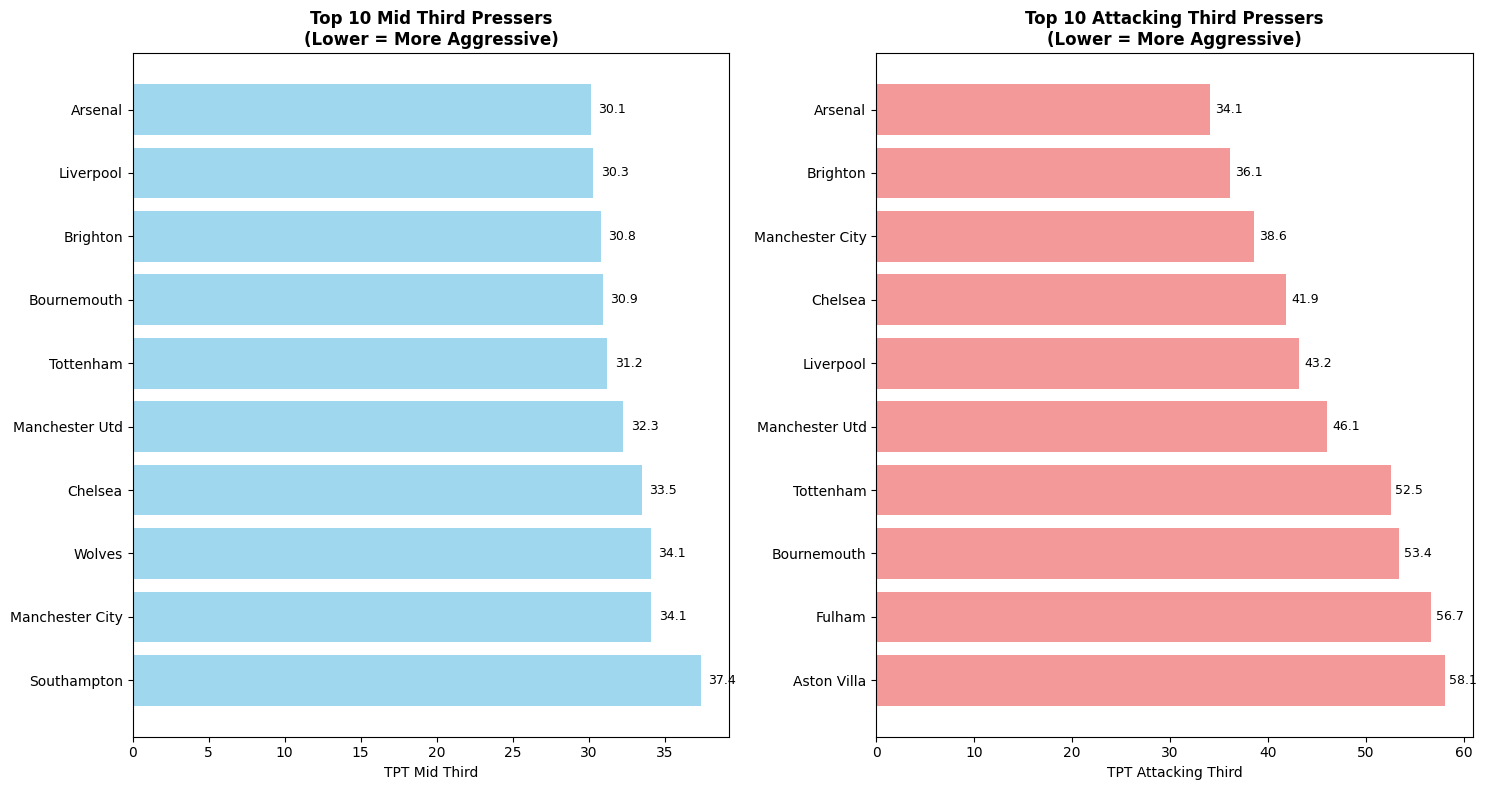

'fig.savefig(\'/Users/amitmishra/epl_2425/tpt_pressing_analysis.png\', dpi=300, bbox_inches=\'tight\')\nprint("Plots saved!")'

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each team
scatter = ax.scatter(df['TPT_mid'], df['TPT_att'], 
                    s=100, alpha=0.7, 
                    c=range(len(df)), cmap='viridis')

# Add team labels
for i, row in df.iterrows():
    ax.annotate(row['Squad'], 
                (row['TPT_mid'], row['TPT_att']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

# Customize the plot
ax.set_xlabel('TPT Mid Third (Touches Per Tackle)', fontsize=12, fontweight='bold')
ax.set_ylabel('TPT Attacking Third (Touches Per Tackle)', fontsize=12, fontweight='bold')
ax.set_title('Premier League Pressing Intensity: TPT Analysis 2024-25\n(Lower values = More aggressive pressing)', 
             fontsize=14, fontweight='bold', pad=20)

# Add quadrant lines (median values)
mid_median = df['TPT_mid'].median()
att_median = df['TPT_att'].median()

ax.axvline(mid_median, color='red', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(att_median, color='red', linestyle='--', alpha=0.5, linewidth=1)



# Add quadrant labels
ax.text(df['TPT_mid'].min() + 1, df['TPT_att'].max() - 2, 
        'Midfield: High Press\nAttack: Low Press', 
        fontsize=10, alpha=0.7, ha='left', va='top',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.3))

ax.text(df['TPT_mid'].max() - 1, df['TPT_att'].min() + 2, 
        'Midfield: Low Press\nAttack: High Press', 
        fontsize=10, alpha=0.7, ha='right', va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.3))

ax.text(0.02, 0.02, 'All Out Press', 
        transform=ax.transAxes,  # Use axes coordinates (0-1)
        fontsize=9, alpha=0.8, ha='left', va='bottom', fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))

ax.text(df['TPT_mid'].max() - 1, df['TPT_att'].max() - 2, 
        'LOW INTENSITY\nPRESSING', 
        fontsize=12, alpha=0.8, ha='right', va='top', fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.4))

# Styling
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add portfolio text
plt.figtext(0.02, 0.02, 'Analysis: Custom TPT metric | Data: FBRef 2024-25', 
            fontsize=8, alpha=0.6)

plt.tight_layout()
plt.show()

# Also create a ranking visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Top 10 Mid Third Pressers
df_mid_sorted = df.sort_values('TPT_mid').head(10)
bars1 = ax1.barh(range(len(df_mid_sorted)), df_mid_sorted['TPT_mid'], 
                 color='skyblue', alpha=0.8)
ax1.set_yticks(range(len(df_mid_sorted)))
ax1.set_yticklabels(df_mid_sorted['Squad'])
ax1.set_xlabel('TPT Mid Third')
ax1.set_title('Top 10 Mid Third Pressers\n(Lower = More Aggressive)', fontweight='bold')
ax1.invert_yaxis()

# Add values on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center', fontsize=9)

# Top 10 Attacking Third Pressers
df_att_sorted = df.sort_values('TPT_att').head(10)
bars2 = ax2.barh(range(len(df_att_sorted)), df_att_sorted['TPT_att'], 
                 color='lightcoral', alpha=0.8)
ax2.set_yticks(range(len(df_att_sorted)))
ax2.set_yticklabels(df_att_sorted['Squad'])
ax2.set_xlabel('TPT Attacking Third')
ax2.set_title('Top 10 Attacking Third Pressers\n(Lower = More Aggressive)', fontweight='bold')
ax2.invert_yaxis()

# Add values on bars
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Save the plots
'''fig.savefig('/Users/amitmishra/epl_2425/tpt_pressing_analysis.png', dpi=300, bbox_inches='tight')
print("Plots saved!")'''